# <font color='056938'> Contexto del caso de Estudio
---

El conjunto de datos contiene 36733 instancias de 11 medidas de sensores agregadas durante una hora (mediante promedio o suma) de una turbina de gas ubicada en la región noroeste de Turquía con el fin de estudiar las emisiones de gases de combustión, a saber, CO y NOx (NO + NO2).

Los datos provienen de la misma planta de energía que el conjunto de datos (http://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant) utilizado para predecir el rendimiento energético neto por hora. Por el contrario, estos datos se recopilan en otro rango de datos (01.01.2011 - 31.12.2015), incluye parámetros de la turbina de gas (como la temperatura de entrada de la turbina y la presión de descarga del compresor) además de las variables ambientales.

Tenga en cuenta que las fechas no se dan en las instancias pero los datos están ordenados en orden cronológico. Consulte la información del atributo y el documento relevante para obtener más detalles.

Siga amablemente el protocolo mencionado en el documento (utilizando los datos de los primeros tres años para capacitación/validación cruzada y los dos últimos para pruebas) para la reproducibilidad y comparabilidad de los trabajos. **El conjunto de datos se puede utilizar bien para predecir el rendimiento energético de la turbina (TEY)** utilizando variables ambientales como características.

Las explicaciones de las mediciones de los sensores y sus breves estadísticas se dan a continuación.

Variable (Abrev.) Unidad Mín. Máx.

* Media Temperatura ambiente (AT) C –6,23 37,10 17,71
* Presión ambiente (AP) mbar 985,85 1036,56 1013,07
* Humedad ambiente (AH) (%) 24,08 100,20 77,87
* Diferencia de presión del filtro de aire (AFDP) mbar 2,09 7,61 3,93
* Presión de escape de la turbina de gas (GTEP) mbar 17,70 40,72 25,56
* Temperatura de entrada de la turbina (TIT) C 1000,85 1100,89 1081,43
* Temperatura posterior de la turbina (TAT) C 511,04 550,61 546,16
* Presión de descarga del compresor (CDP) mbar 9,85 6 12.06
* Rendimiento energético de la turbina (TEY) MWH 100,02 179,50 133,51
* Monóxido de carbono (CO) mg/m3 0,00 44,10 2,37
* Óxidos de nitrógeno (NOx) mg/m3 25,90 119,91 65,29

# <font color='056938'> Librerías
---

In [1]:
## Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as python_random

## Librerias para modelos de ML
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Librerias para redes neuronales
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt
from keras_tuner.tuners import RandomSearch

In [2]:
def reset_seeds():
    np.random.seed(123)
    python_random.seed(123)
    tf.random.set_seed(123)

# <font color='056938'> Lectura de Datos
---

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/Leostark95/Analitica_2_Proyecto_3/main/df.csv", sep=",")

In [4]:
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,11.898,0.32663,81.9520,134.67
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,11.892,0.44784,82.3770,134.67
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,12.042,0.45144,83.7760,135.10
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,11.990,0.23107,82.5050,135.03
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,11.910,0.26747,82.0280,134.67
...,...,...,...,...,...,...,...,...,...,...,...
36721,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,10.411,3.52964,89.1720,109.08
36722,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,10.344,3.45756,88.8490,108.79
36723,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,10.462,3.38548,76.7935,107.81
36724,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,11.771,3.31340,64.7380,131.41


# <font color='056938'> Preprocesamiento de Datos
---

In [5]:
## Separación de X y y
X = df.drop(columns=['TEY'])
y = df['TEY']

X.shape, y.shape

((36726, 10), (36726,))

## <font color='157699'> Escalado
---

In [6]:
## Escalado de los datos
sc = StandardScaler()
X_sc = sc.fit_transform(X)

# Separación de los splits de datos: train/val/test - 70%/21%/9%
X_train, X_rem, y_train, y_rem = train_test_split(X_sc, y, train_size=0.7, random_state=0) 

X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.3, random_state=0)

# Tamaños de los splits definidos
print("Conjunto de entrenamiento: ", X_train.shape, y_train.shape)
print("Conjunto de validación: ", X_val.shape, y_val.shape)
print("Conjunto de test: ", X_test.shape, y_test.shape)

Conjunto de entrenamiento:  (25708, 10) (25708,)
Conjunto de validación:  (7712, 10) (7712,)
Conjunto de test:  (3306, 10) (3306,)


* Escalamos los datos para obtener eficiencia a la hora de entrenar la red neuronal. Sin embargo, también se pueden pasar los datos en bruto.

* Hacemos 3 divisiones en los datos para tener una fuente extra cuadno se etrene la red neuronal.

* Tenemos 25708 datos para el entrenamiento, lo que equivale al 70% del conjunto total de datos.

* Hay 7712 datos para validar, que en conjunto con el dataset de entrenamiento, se van a utilizar para optimizar la red neuronal y estimar los hiperparámetros.

* Finalmente con el conjunto de test, que consta de 3306 datos, vamos a sacar métricas y corroborar los resultados que va a dar la red neuronal después del entrenamiento.

In [7]:
## Definición de la ANN base
reset_seeds()

## definición de hiperparámetros iniciales
dor = 0.3 # dropout rate
sr = 0.1 # regularization streght
l2 = keras.regularizers.l2(sr) # regularizador

## ANN1
ann1 = keras.models.Sequential(
    [
        keras.Input(shape=(10,)), # no hay que hacer aplanamiento de datos, se pasan como están # 10 variables
        keras.layers.Dense(128, activation = 'relu', kernel_regularizer = l2),
        keras.layers.Dense(64, activation = 'relu'),
        keras.layers.Dropout(dor),
        keras.layers.Dense(16, activation = 'tanh'),
        keras.layers.Dense(1, activation = 'relu') # una variable a predecir # relu para que siempre de valores positivos
    ]
)

m1 = keras.metrics.MeanAbsolutePercentageError(name='mape') # compilador

ann1.compile(
    optimizer= 'adam',
    loss = keras.losses.MeanSquaredError(),
    metrics = [m1]
)

history = ann1.fit(X_train, y_train, epochs=40, validation_data=(X_val, y_val))

Epoch 1/40
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 16032.5840 - mape: 94.1251 - val_loss: 13475.0723 - val_mape: 85.9304
Epoch 2/40
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 12691.6846 - mape: 83.4312 - val_loss: 10686.6777 - val_mape: 76.1919
Epoch 3/40
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 10021.5254 - mape: 73.7828 - val_loss: 8324.4150 - val_mape: 66.8629
Epoch 4/40
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7761.1787 - mape: 64.5202 - val_loss: 6332.7314 - val_mape: 57.8661
Epoch 5/40
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5861.3164 - mape: 55.5811 - val_loss: 4675.7837 - val_mape: 49.1746
Epoch 6/40
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4288.8975 - mape: 46.9480 - val_loss: 3327.0674 - val_mape: 40.7970
Epoch 7/40
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3018.7288 - mape: 38.6374 - val_loss: 2264.0447 - val_mape: 32.7748
Epoch 8/40
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2028.4866 - mape: 30.7000 - val_loss: 1

* El MAPE alcazó a llegar a un valor de 0.48, lo que quiere decir que el modelo es muy bueno. Sin embargo vamos a ver las curvas de error para ver si hay la posibilidad de que haya sobreajuste del modelo.

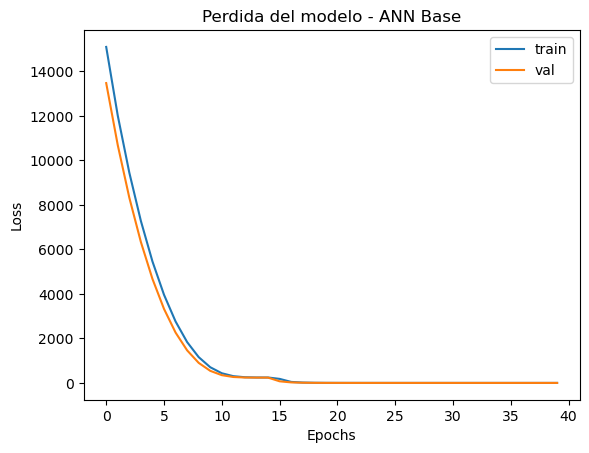

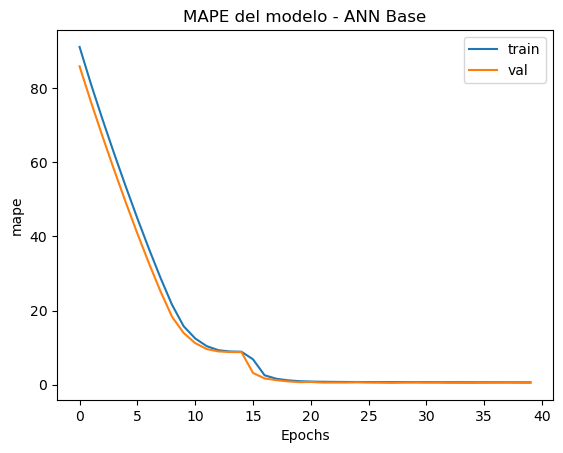

In [8]:
### Visualización de las curvas de error
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perdida del modelo - ANN Base')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'])
plt.show()

### Visualización de las curvas de MAPE
plt.plot(history.history['mape'])
plt.plot(history.history['val_mape'])
plt.title('MAPE del modelo - ANN Base')
plt.xlabel('Epochs')
plt.ylabel('mape')
plt.legend(['train', 'val'])
plt.show()

* Para la gráfica de función de pérdida, el comportamiento de las curvas es muy similar y a simple vista no se ven indicios de que haya sobreajuste

* La gráfica de MAPE también muestra un comportamiento similar a la gráfica de función de pérdida en el sentido en que las curvas son muy similares entre sí.

# <font color='056938'> Tuning de la ANN Base
---

In [9]:
### Definición de hiperparámetros
hp = kt.HyperParameters()
lo = keras.losses.MeanSquaredError()
m2 = keras.metrics.MeanAbsolutePercentageError(name='prueba')

In [10]:
def tun_model(hp):
    dor = hp.Float('DOR', min_value=0.1, max_value=0.4, step=0.1)
    opt = hp.Choice('OPT', ['adam', 'adamax', 'sgd'])
    units_1 = hp.Int('UNITS_1', min_value = 64, max_value=512, step=32)

    ann = keras.models.Sequential(
        [
            keras.Input(shape=(10,)),
            keras.layers.Dense(units= units_1, activation = 'relu', kernel_regularizer = l2),
            keras.layers.Dense(64, activation = 'relu'),
            keras.layers.Dropout(dor),
            keras.layers.Dense(16, activation = 'tanh'),
            keras.layers.Dense(1, activation = 'relu')
        ]
    )

    if opt == 'adam':
        opt = keras.optimizers.Adam(learning_rate=0.0001)
    elif opt == 'adamax':
        opt = keras.optimizers.Adamax(learning_rate=0.0001)
    else:
        opt = keras.optimizers.SGD(learning_rate=0.0001)
    
    ann.compile(optimizer=opt, loss=lo, metrics=[m2]) # compilador

    return ann

In [20]:
reset_seeds()

# Definción del Tuner
search_model = kt.RandomSearch(
    hypermodel= tun_model,
    hyperparameters = hp,
    objective= kt.Objective('prueba', direction="min"),
    max_trials=20,
    directory="resultados",
    project_name="Proyecto"
)

In [ ]:
# Ejecutar tuner
search_model.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

In [ ]:
## Separación del mejor modelo
best_model = search_model.get_best_models()[0]
hps = search_model.get_best_hyperparameters()[0]
hps.values

In [ ]:
## Summary del modelo
best_model.summary()

## <font color='056938'> Caso de Estudio: Predicción del Rendimiento Energético de Turbinas de Gas

#### <font color='157699'> a. Descripción del Problema de Negocio

<font color='000000'>

**Contexto:**
La planta de energía ubicada en la región noroeste de Turquía utiliza turbinas de gas para la generación de electricidad. La eficiencia energética de estas turbinas es crucial para la viabilidad económica y operativa de la planta. El rendimiento energético de la turbina (TEY) está influenciado por múltiples factores, incluyendo condiciones operativas de la turbina y variables ambientales.

**Problema:**
El rendimiento energético inconsistente o subóptimo puede llevar a mayores costos de operación y mantenimiento, afectando la rentabilidad de la planta. Además, operar fuera de los niveles óptimos de eficiencia puede resultar en un uso excesivo de combustibles, incrementando las emisiones contaminantes y el impacto ambiental. 

**Objetivos:**
- **Optimizar el Rendimiento Energético:** Maximizar la eficiencia energética de las turbinas de gas.
- **Reducir Costos de Operación:** Minimizar el consumo de combustible y otros recursos operativos.
- **Prevenir Mantenimiento No Planificado:** Detectar problemas operativos antes de que resulten en fallos críticos.
- **Mejorar la Sostenibilidad Ambiental:** Reducir las emisiones contaminantes asociadas con un bajo rendimiento energético.

**Impacto:**
Resolver este problema tendrá varios beneficios para la empresa:
1. **Aumento de la Rentabilidad:** Mejorar la eficiencia energética reduce los costos de operación y aumenta los márgenes de beneficio.
2. **Cumplimiento Normativo:** Optimizar las operaciones reduce el riesgo de exceder los límites de emisiones regulados.
3. **Mejora de la Reputación:** Ser visto como una empresa eficiente y ambientalmente responsable mejora la relación con la comunidad y las autoridades regulatorias.
4. **Mantenimiento Predictivo:** Identificar y solucionar problemas antes de que causen fallos críticos mejora la confiabilidad y reduce los tiempos de inactividad.

#### <font color='157699'> b. Propuesta de Solución

<font color='000000'>

**Solución Analítica:**
Desarrollar un modelo predictivo utilizando redes neuronales artificiales (ANN) para predecir el rendimiento energético de la turbina (TEY) basándose en las características operativas de las turbinas y las variables ambientales.

**Detalles del Modelo:**
- **Entrenamiento del Modelo:** Utilizar datos de los primeros tres años (2011-2013) para entrenar el modelo. Esto asegura que el modelo tenga suficientes datos históricos para aprender las relaciones complejas entre las variables.
- **Validación del Modelo:** Utilizar datos del cuarto año (2014) para validar y ajustar el modelo. Esto ayuda a prevenir el sobreajuste y asegura que el modelo generalice bien a nuevos datos.
- **Pruebas del Modelo:** Utilizar datos del último año (2015) para evaluar la precisión del modelo en datos no vistos. Esto proporciona una estimación realista de cómo se desempeñará el modelo en el mundo real.

**Resultados del Modelo:**
- **Pérdida (Loss):** El modelo logra una pérdida mínima tanto en el conjunto de entrenamiento como en el de validación, lo que indica una buena capacidad de ajuste a los datos.
- **MAPE (Mean Absolute Percentage Error):** El modelo presenta un MAPE bajo, lo que indica una alta precisión en las predicciones.

**Gráficas de Resultados:**
1. **Gráfica de Pérdida del Modelo:**
   - La pérdida disminuye rápidamente en las primeras 10 epochs y se estabiliza alrededor de las épocas 10 a 15.
   - Las curvas de entrenamiento y validación son muy similares, lo que indica que el modelo no está sobreajustando y tiene una buena capacidad de generalización.

2. **Gráfica de MAPE del Modelo:**
   - El MAPE disminuye de manera pronunciada en las primeras 10 epochs, estabilizándose alrededor de las épocas 10 a 15.
   - Las curvas de MAPE para el entrenamiento y la validación son prácticamente idénticas, lo que sugiere que el modelo mantiene una buena generalización y no presenta sobreajuste.

**Implementación:**
1. **Integración en el Sistema de Control:** 
   - El modelo puede ser integrado en el sistema de control de la planta para proporcionar predicciones en tiempo real del rendimiento energético de la turbina (TEY).
   - Las predicciones en tiempo real permitirán a los operadores ajustar las condiciones operativas de las turbinas para optimizar el rendimiento energético.

2. **Optimización de la Operación:**
   - Utilizar las predicciones del modelo para ajustar parámetros operativos como la temperatura de entrada de la turbina, la presión de descarga del compresor, y otros factores críticos que afectan el rendimiento energético.
   - Implementar un sistema de retroalimentación que ajuste automáticamente los parámetros operativos en función de las predicciones del modelo para mantener el rendimiento energético en niveles óptimos.

3. **Monitoreo y Mantenimiento:**
   - Implementar un sistema de monitoreo continuo para ajustar el modelo y mejorar su precisión con datos adicionales a medida que se recopilan.
   - Utilizar las predicciones del modelo para identificar patrones y tendencias que puedan indicar problemas potenciales con las turbinas antes de que ocurran fallos graves.
   - Implementar un programa de mantenimiento predictivo basado en las predicciones del modelo para reducir el tiempo de inactividad y los costos de mantenimiento.

## <font color='157699'> Conclusión

<font color='000000'>

El desarrollo e implementación de un modelo predictivo basado en redes neuronales para predecir el rendimiento energético de turbinas de gas tiene el potencial de transformar la operación de la planta. Al proporcionar predicciones precisas y en tiempo real del rendimiento energético, el modelo permitirá a la empresa optimizar las condiciones operativas, reducir costos, cumplir con las regulaciones ambientales, y mejorar la eficiencia y confiabilidad de las turbinas de gas. En última instancia, esto no solo mejorará la sostenibilidad y la reputación de la empresa, sino que también proporcionará beneficios económicos significativos.